What is the filename of the data to be analyzed?: PromBins.xlsx
Found the following strains: 

"0" Parent
"1" ADH1ps
"2" HXT7ps
"3" CCW12ps
"4" HSP30ps
"5" RHR2ps
"6" HHF2ps

 Type the number corresponding to the desired columns separated by spaces and press enter. (i.e.: "3 5 7"): 0 6 3


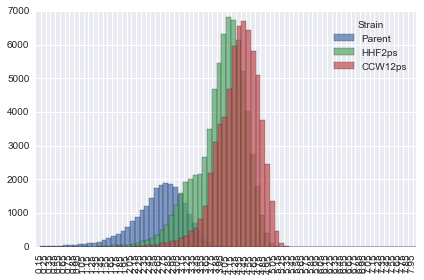

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import math
from pandas import ExcelWriter
%matplotlib inline 

def histoBins(filename):

	# Import files from excel
	df = pd.read_excel(filename).transpose()

	# Drop and rearrange rows to make it easier for pandas to interpret
	df.columns = df.iloc[0]
	df = df.drop(df.index[0])

	# Gather a list of strains
	counter = 0
	colDict = {}
	print("Found the following strains: \n")
	for value in df.columns.values:
		
		print("\"" + str(counter) + "\"" " " + value)
		colDict[str(counter)] = value
		counter +=1

	# Query user for desired columns
	labels = input("\n Type the number corresponding to the desired columns separated by spaces and press enter. (i.e.: \"3 5 7\"): ")
	labels = labels.split()

	# Match numbers to names of strains
	labels2 = []
	for num in labels:
		labels2.append(colDict[num])

	# Retain desired columns
	df2 = df
	df2 = df2.reindex(columns = labels2)
	df2 = df2.astype(float)

	# Make column width fullwidth to look like a histogram
	ax = df2.plot(kind = 'bar', align = 'center', alpha = 0.7)

	for container in ax.containers:
		plt.setp(container, width = 1)

	x0, x1 = ax.get_xlim()
	ax.set_xlim(x0 -0.5, x1 + 0.25)
	(-0.5, 6.5)
	plt.tight_layout()

	plt.show()

def askUser():

    filename = input("What is the filename of the data to be analyzed?: ")
    histoBins(filename)

askUser()